###### - 자산 3개라고 한다면...
- $r_{BM}$ : 시장포트폴리오 수익률  (3x1 벡터)
- $r_{f} $ : 무위험수익률 .. 국고채3년물
- $W_{mkt}$ : 가장 최근의 시가총액을 세 개 종목의 시가총액 합계로 나눔
- $\Sigma$ : 자산 간 수익률 공분산
- $\lambda$ = $\frac{E(r)-r_{f}}{\sigma^2_{BM}}$ : 위험회피계수
- $E(r)$ = $W^T_{mkt}r_{BM}$  
- $\sigma^2_{BM}$ = $W^T_{mkt}\Sigma W_{mkt}$ = 스칼라 : 시장포트폴리오 수익률
- $\Pi$ = $\lambda\Sigma w_{mkt}$
- P : 투자자 전망 행렬 picking matrix
- Q : 전망 수익률  2x1 벡터
- $\Omega$ = $P(\tau \Sigma)P^T$ : 투자자 전망의 불확실성 (오차항 공분산 행렬)
     - 2x2 대각행렬
- $E(E(r)|\Pi) = [(\tau\Sigma)^{-1}+P^T\Omega^{-1}P]^{-1}[(\tau\Sigma)^{-1}\Pi + P^T\Omega^{-1}Q]$

- $W_{BL} = (\lambda\Sigma)^{-1}(E(E(r)|\Pi)-r_f)$ : 최종투자비중

In [1]:
%load_ext autoreload
%autoreload 2
from blacklitterman import *

# DATA

In [171]:
info = load_info('0707')
marcap = info[['name','marcap']]
marcap

,name,marcap
0,KODEX 200,3829434000000
1,TIGER 코스닥150,89676000000
2,TIGER 미국S&P500선물(H),234071250000
3,"TIGER 유로스탁스50(합성,H)",81095500000
4,KINDEX 일본 Nikkei225(H),14868000000
5,TIGER 차이나CSI300,304673000000
6,KOSEF 국고채10년,147491900000
7,KBSTAR 중기우량회사채,119819700000
8,"TIGER 단기선진하이일드(합성,H)",15030000000
9,KODEX 골드선물(H),236135500000


In [172]:
df = load_data(datetime.datetime(2020,7,7), datetime.datetime(2021,7,7))
market = load_data(datetime.datetime(2020,7,7), datetime.datetime(2021,7,7), 'market')

$E(R) = [(\tau \Sigma)^{-1} + P^T \Omega^{-1} P]^{-1}[(\tau \Sigma)^{-1} \Pi + P^T \Omega^{-1} Q]$

# prior

$\delta = \frac{R-R_f}{\sigma^2}$

$\Pi = \delta \Sigma w_{mkt}$

In [173]:
sigma = bl_prior(df, market, marcap)[0]
d = bl_prior(df, market, marcap)[1]
marcap_dict = bl_prior(df, market, marcap)[2]
market_prior = bl_prior(df, market, marcap)[3]

# views

- 6개월 모멘텀

In [174]:
view, confidence = bl_investors_view(df, 10, sigma)

,lr,rank
TIGER 코스닥150,2.241508,1.0
TIGER 미국S&P500선물(H),1.248374,2.0
TIGER 원유선물Enhanced(H),0.491371,3.0
KODEX 골드선물(H),0.437731,4.0
KOSEF 국고채10년,0.295573,5.0
KOSEF 미국달러선물,0.158091,6.0
KOSEF 단기자금,0.124369,7.0
"TIGER 단기선진하이일드(합성,H)",0.097970,8.0
KODEX 인버스,0.056637,9.0
KBSTAR 중기우량회사채,0.031702,10.0


In [175]:
view

{'TIGER 코스닥150': 2.241507630763478,
 'TIGER 미국S&P500선물(H)': 1.2483735147148207,
 'TIGER 원유선물Enhanced(H)': 0.49137081397444093,
 'KODEX 골드선물(H)': 0.4377307942185775,
 'KOSEF 국고채10년': 0.2955732418368225,
 'KOSEF 미국달러선물': 0.15809085915138238,
 'KOSEF 단기자금': 0.12436899258599937,
 'TIGER 단기선진하이일드(합성,H)': 0.09796985225806505,
 'KODEX 인버스': 0.05663732124001701,
 'KBSTAR 중기우량회사채': 0.031702415760778986,
 'KODEX 200': -0.02798477065982394,
 'KOSEF 미국달러인버스선물': -0.18645626033079288,
 'TIGER 차이나CSI300': -0.2341683390965349,
 'KINDEX 일본 Nikkei225(H)': -0.5045638763867394,
 'TIGER 유로스탁스50(합성,H)': -0.5239231710989855}

# Posterior

,Prior,Posterior,Views
KODEX 200,0.239256,0.010998,-0.027985
TIGER 코스닥150,0.419046,2.000426,2.241508
TIGER 미국S&P500선물(H),0.143182,0.482668,1.248374
"TIGER 유로스탁스50(합성,H)",0.111688,-0.520541,-0.523923
KINDEX 일본 Nikkei225(H),0.131536,-0.465888,-0.504564
TIGER 차이나CSI300,0.134919,-0.193380,-0.234168
KOSEF 국고채10년,0.017839,0.273285,0.295573
KBSTAR 중기우량회사채,0.020848,0.033064,0.031702
"TIGER 단기선진하이일드(합성,H)",0.029255,0.096882,0.097970
KODEX 골드선물(H),0.066878,0.414306,0.437731


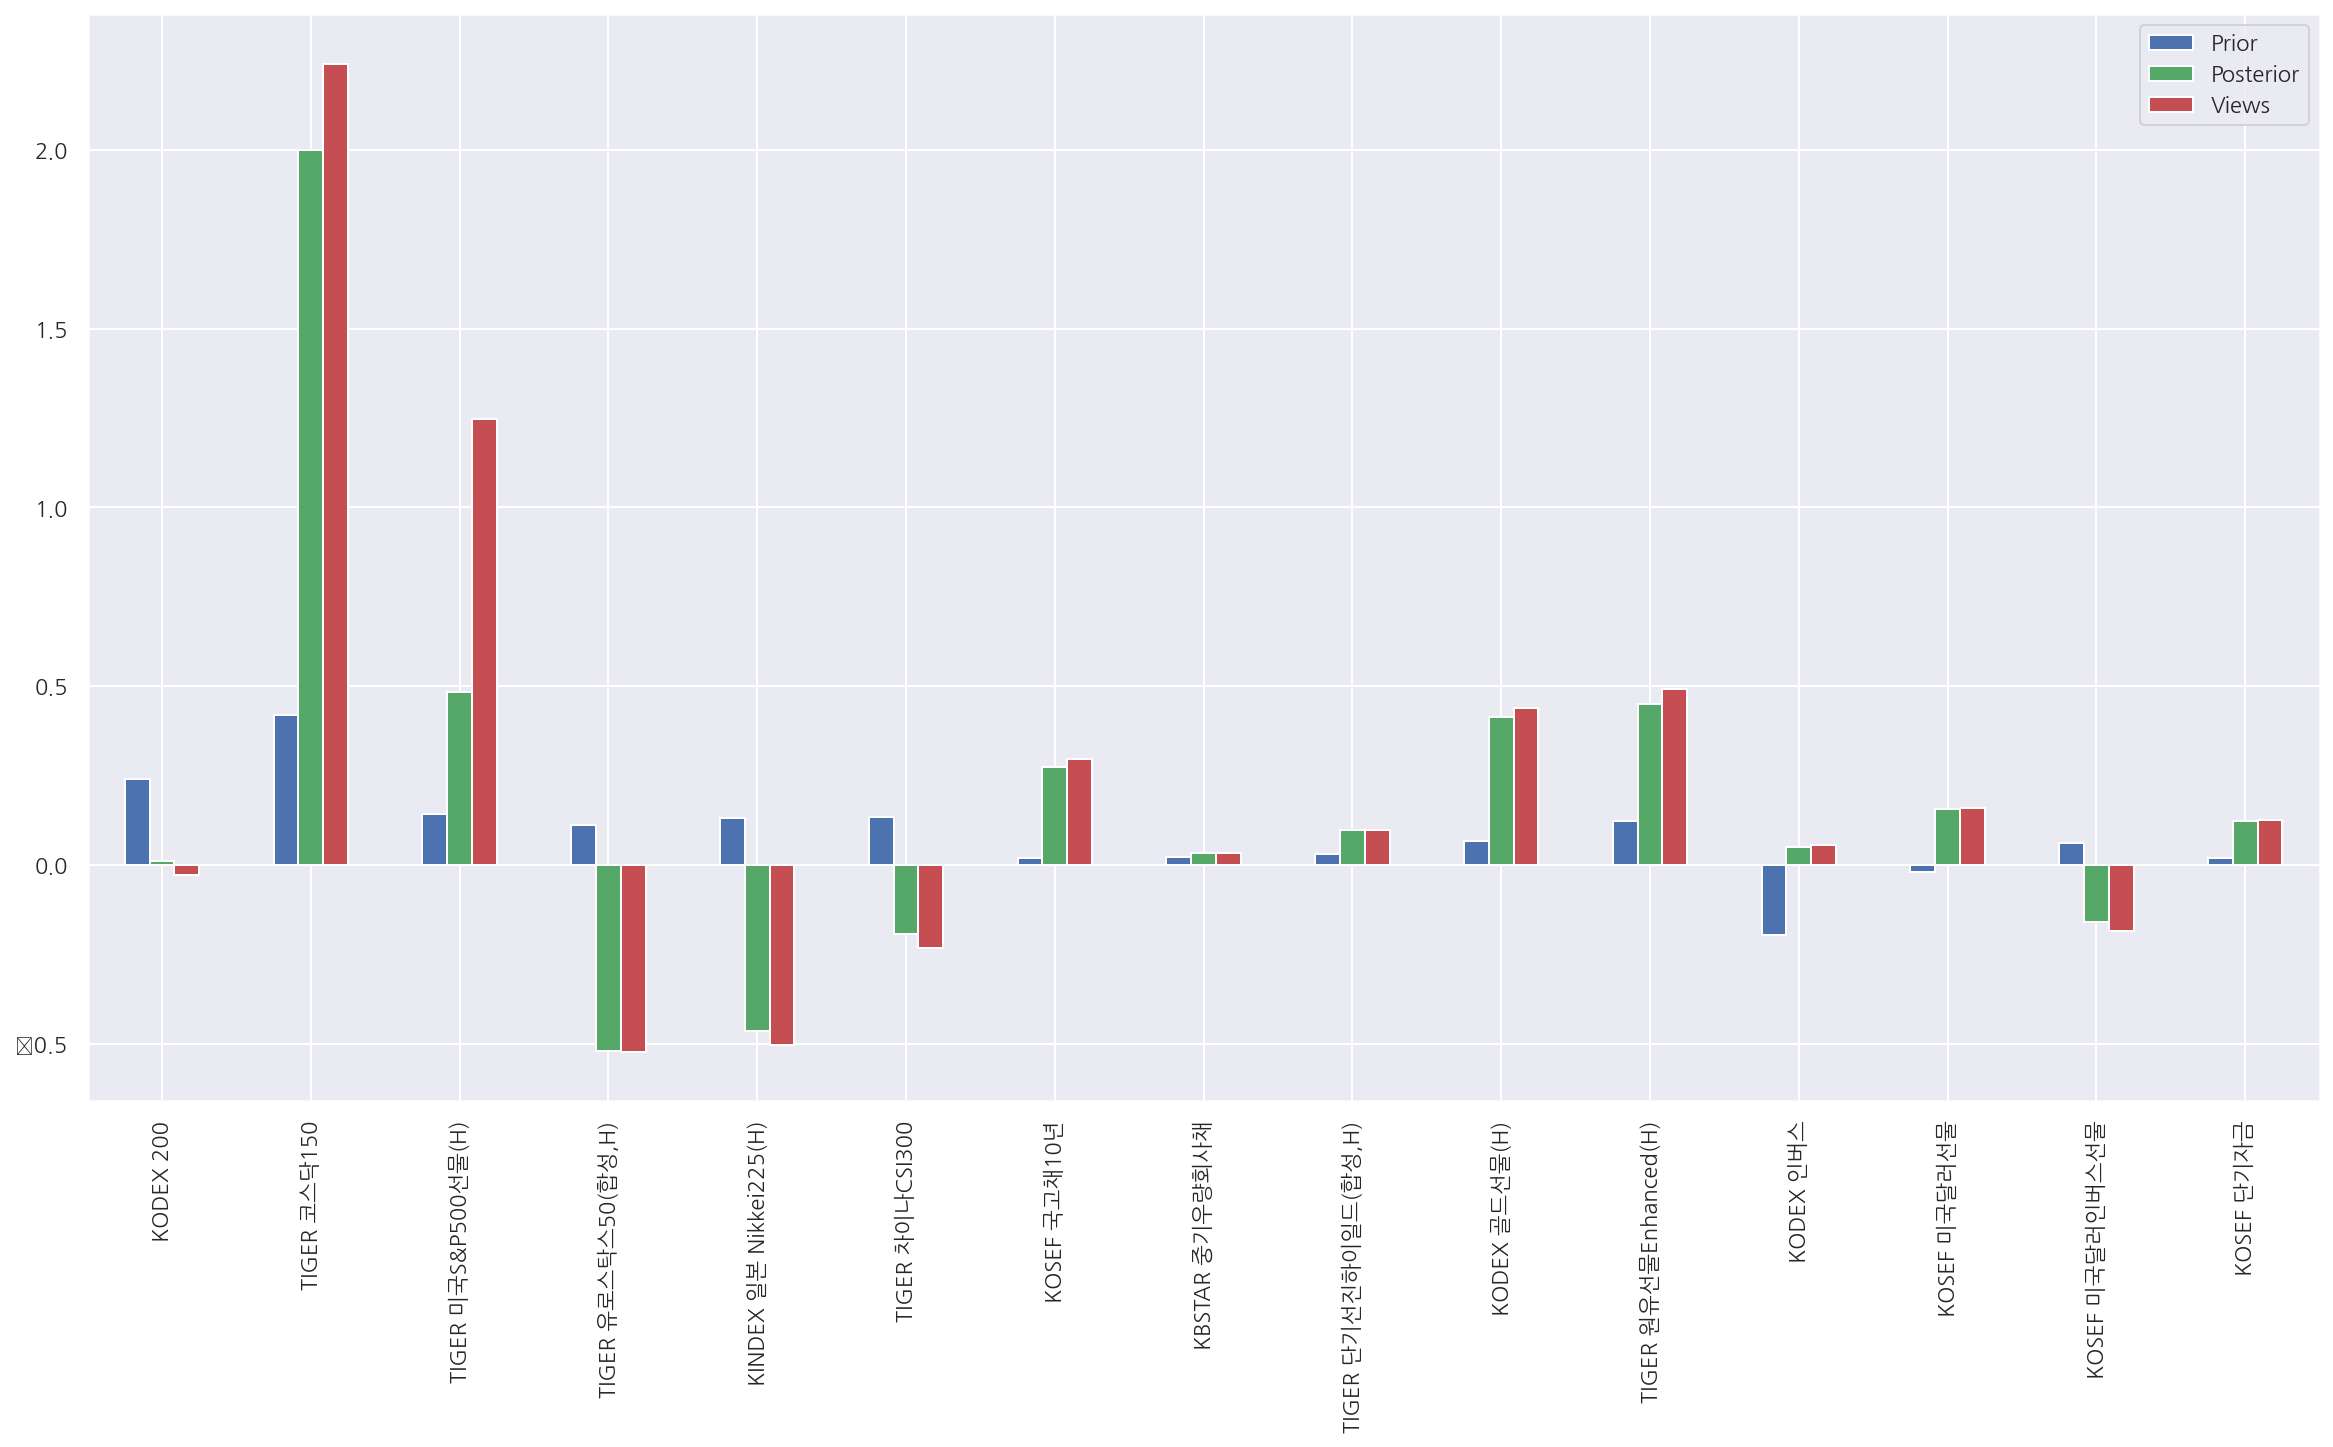

In [176]:
returns_bl, sigma_bl = bl_posterior(sigma, market_prior, view, confidence, marcap_dict, d)

# allocation

{'KODEX 200': 0.0,
 'TIGER 코스닥150': 0.2,
 'TIGER 미국S&P500선물(H)': 0.1498,
 'TIGER 유로스탁스50(합성,H)': 0.0,
 'KINDEX 일본 Nikkei225(H)': 0.0,
 'TIGER 차이나CSI300': 0.0,
 'KOSEF 국고채10년': 0.1128,
 'KBSTAR 중기우량회사채': 0.0562,
 'TIGER 단기선진하이일드(합성,H)': 0.0701,
 'KODEX 골드선물(H)': 0.1125,
 'TIGER 원유선물Enhanced(H)': 0.1119,
 'KODEX 인버스': 0.0366,
 'KOSEF 미국달러선물': 0.0732,
 'KOSEF 미국달러인버스선물': 0.0,
 'KOSEF 단기자금': 0.077}

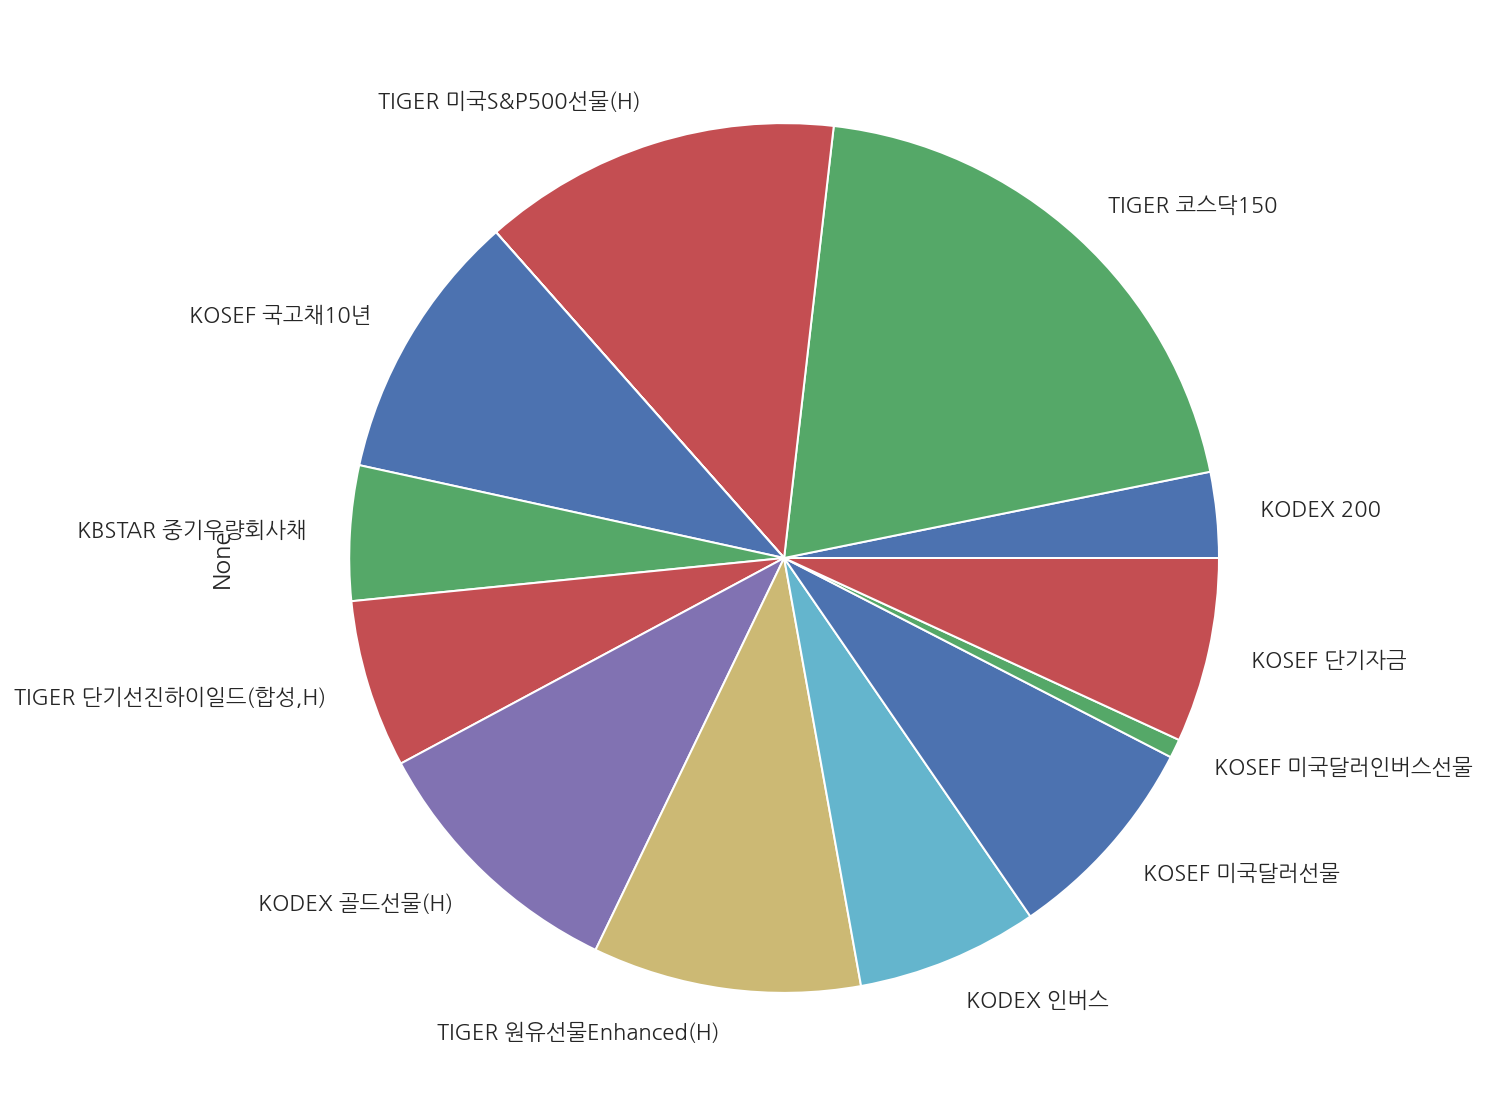

In [177]:
max_sharpe_allocate(returns_bl, sigma_bl)

In [36]:
from pypfopt import DiscreteAllocation

result = DiscreteAllocation(final_sharpe, df.iloc[-1], total_portfolio_value=8968609.87)
dist, left = result.lp_portfolio()
print("남은돈: {:.2f}달러".format(left))
dist

남은돈: 2884.87달러


{'TIGER 코스닥150': 107,
 'TIGER 미국S&P500선물(H)': 19,
 'KINDEX 일본 Nikkei225(H)': 8,
 'KOSEF 국고채10년': 9,
 'KBSTAR 중기우량회사채': 3,
 'TIGER 단기선진하이일드(합성,H)': 64,
 'KODEX 골드선물(H)': 24,
 'TIGER 원유선물Enhanced(H)': 208,
 'KODEX 인버스': 309,
 'KOSEF 미국달러선물': 69,
 'KOSEF 단기자금': 9}

In [37]:
name = ['KODEX 200','TIGER 코스닥150','TIGER 미국S&P500선물(H)','TIGER 유로스탁스50(합성,H)','KINDEX 일본 Nikkei225(H)','TIGER 차이나CSI300','KOSEF 국고채10년', 'KBSTAR 중기우량회사채','TIGER 단기선진하이일드(합성,H)','KODEX 골드선물(H)','TIGER 원유선물Enhanced(H)','KODEX 인버스','KOSEF 미국달러선물','KOSEF 미국달러인버스선물', 'KOSEF 단기자금']

weights_0531 = pd.Series([6.810,10.830,6.980,4.770,13.160,12.300,10.650,0.510,8.840,11.110,0.390,0.000,0.000,11.700,1.950], name='0531') / 100
weights_0607 = pd.Series(list(final_sharpe.values()), name='0607')
weights = pd.DataFrame(weights_0531)
weights = pd.concat([weights, weights_0607], axis=1)
weights.index= name
weights

,0531,0607
KODEX 200,0.0681,0.0000
TIGER 코스닥150,0.1083,0.2000
TIGER 미국S&P500선물(H),0.0698,0.1056
"TIGER 유로스탁스50(합성,H)",0.0477,0.0000
KINDEX 일본 Nikkei225(H),0.1316,0.0172
TIGER 차이나CSI300,0.1230,0.0000
KOSEF 국고채10년,0.1065,0.1213
KBSTAR 중기우량회사채,0.0051,0.0365
"TIGER 단기선진하이일드(합성,H)",0.0884,0.0905
KODEX 골드선물(H),0.1111,0.0322


In [39]:
test_df = pd.DataFrame([fdr.DataReader(c, start=datetime.datetime(2021,5,31), end=datetime.datetime(2021,6,4))['Close'] for c in code]).T
name = ['KODEX 200','TIGER 코스닥150','TIGER 미국S&P500선물(H)','TIGER 유로스탁스50(합성,H)','KINDEX 일본 Nikkei225(H)','TIGER 차이나CSI300','KOSEF 국고채10년', 'KBSTAR 중기우량회사채','TIGER 단기선진하이일드(합성,H)','KODEX 골드선물(H)','TIGER 원유선물Enhanced(H)','KODEX 인버스','KOSEF 미국달러선물','KOSEF 미국달러인버스선물', 'KOSEF 단기자금']
test_df.columns = name
df_cum_profit = (1 + test_df.pct_change().dropna()).cumprod() - 1
df_cum_profit = df_cum_profit + 1
start = 10000000000 * np.array(list(dict(final_sharpe).values()))
(df_cum_profit.iloc[-1] * start).sum()

9970897492.14651

In [40]:
market_cum_profit = (1 + market.pct_change().dropna()).cumprod() - 1
market_cum_profit

Date
2020-07-03    0.008252
2020-07-06    0.023751
2020-07-07    0.011445
2020-07-08    0.008431
2020-07-09    0.013167
                ...   
2021-06-28    0.575360
2021-06-29    0.569261
2021-06-30    0.574822
2021-07-01    0.565673
2021-07-02    0.563700
Name: Close, Length: 248, dtype: float64

# 시각화 자료 정리

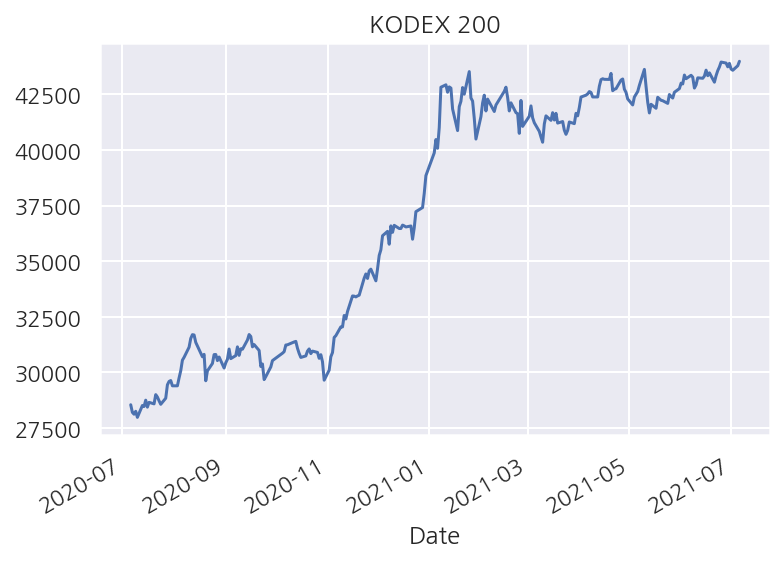

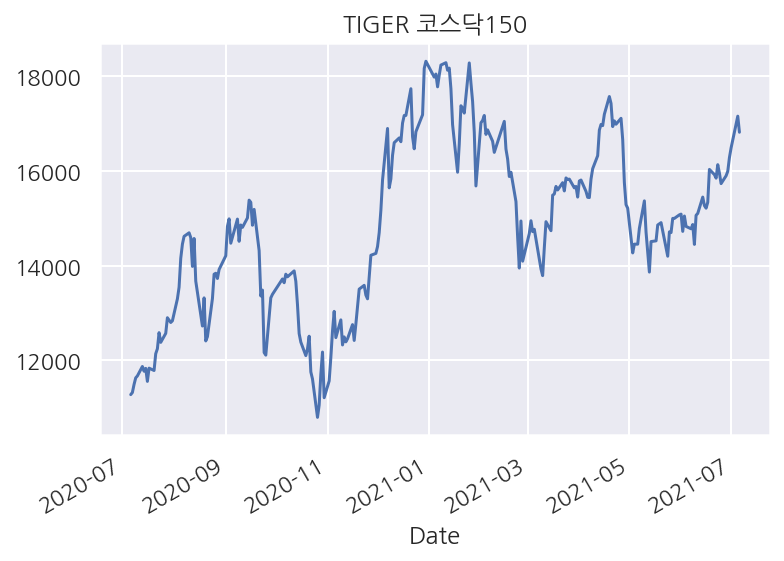

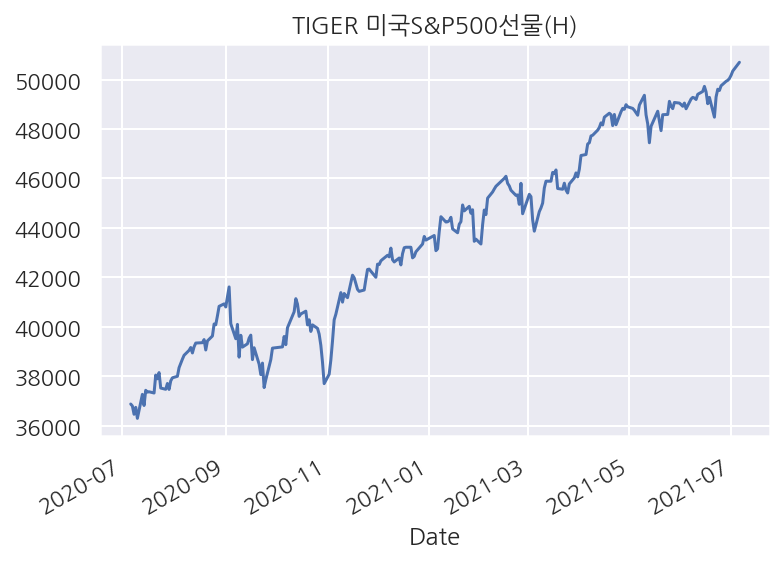

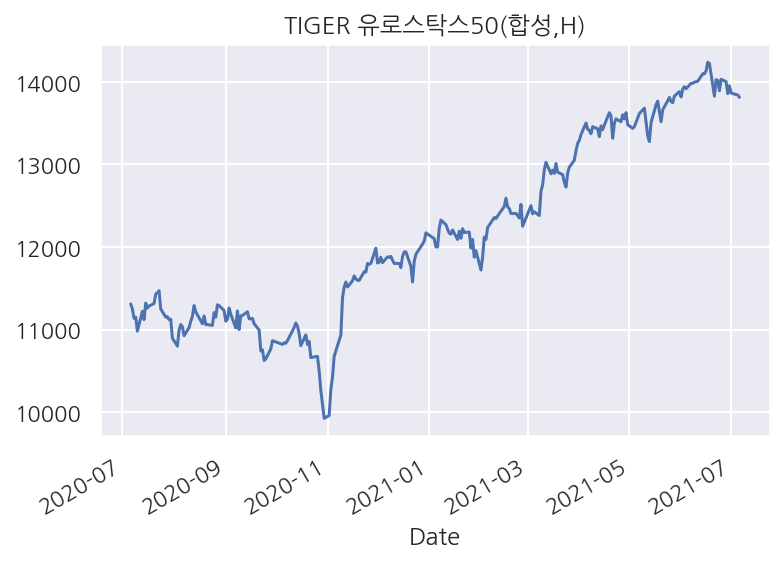

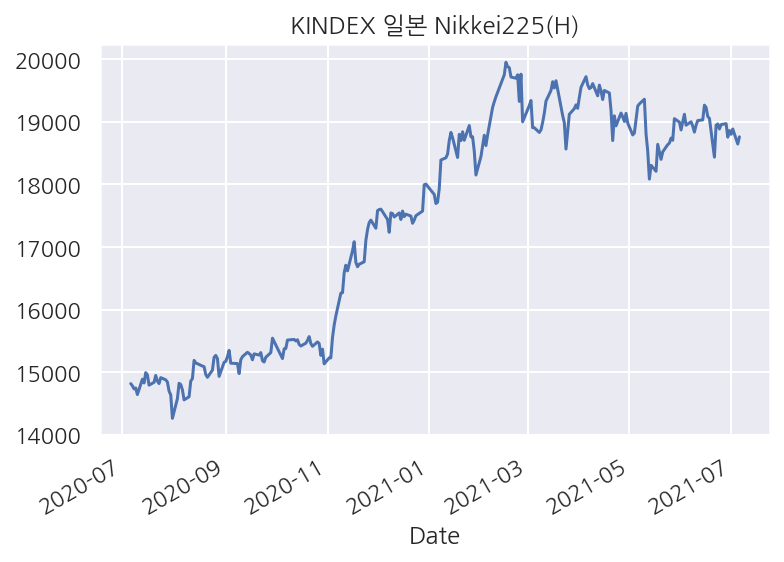

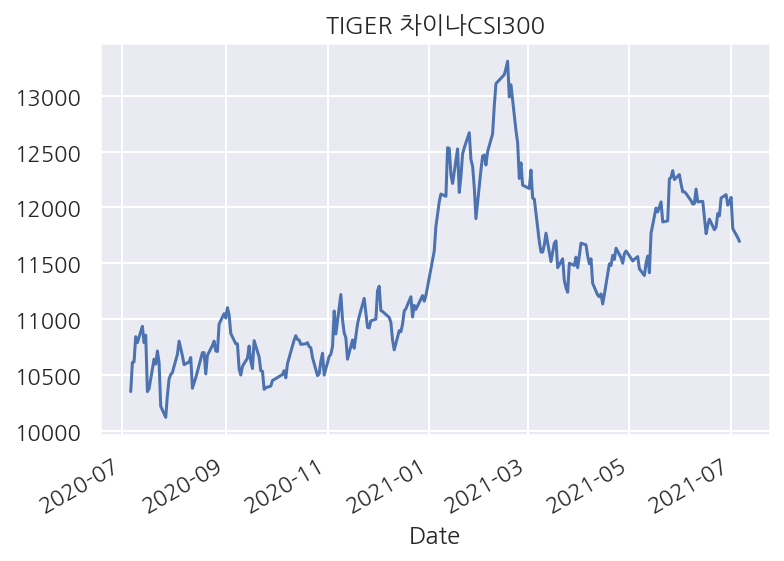

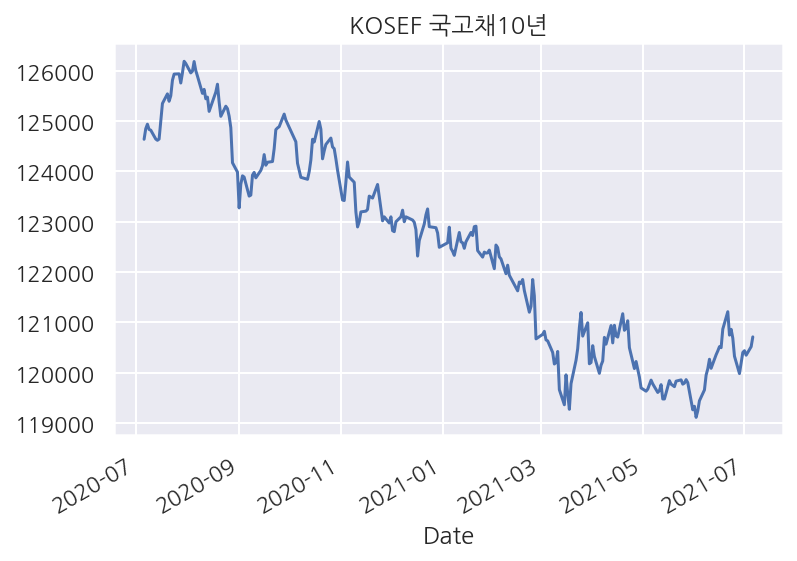

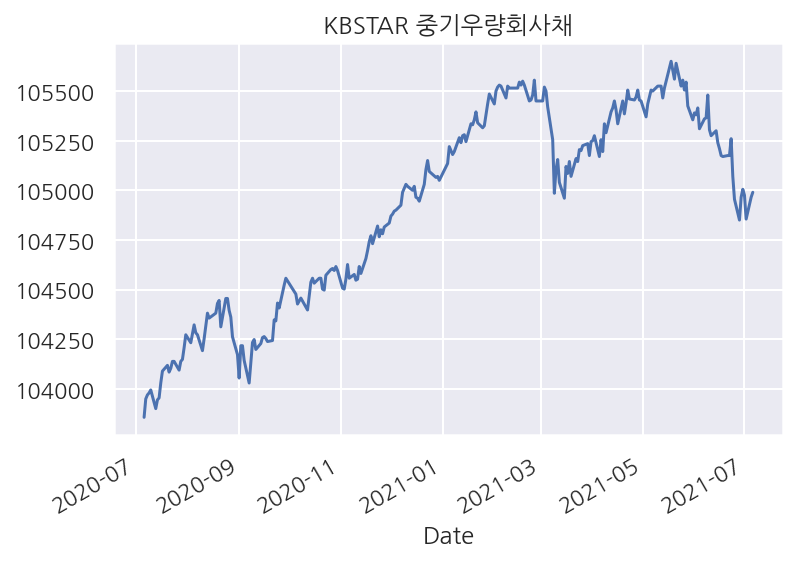

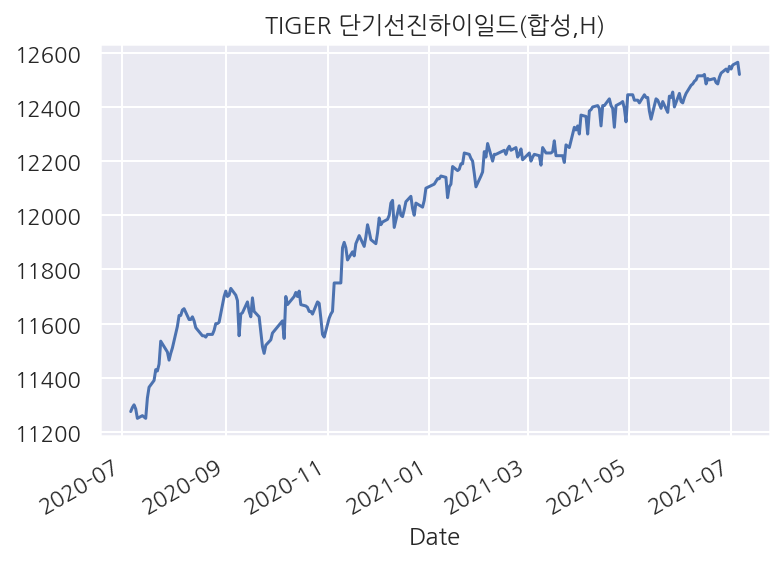

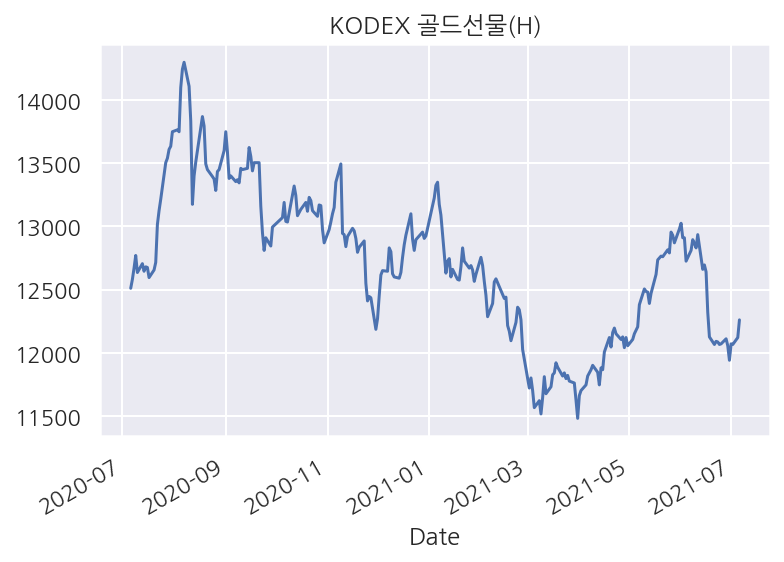

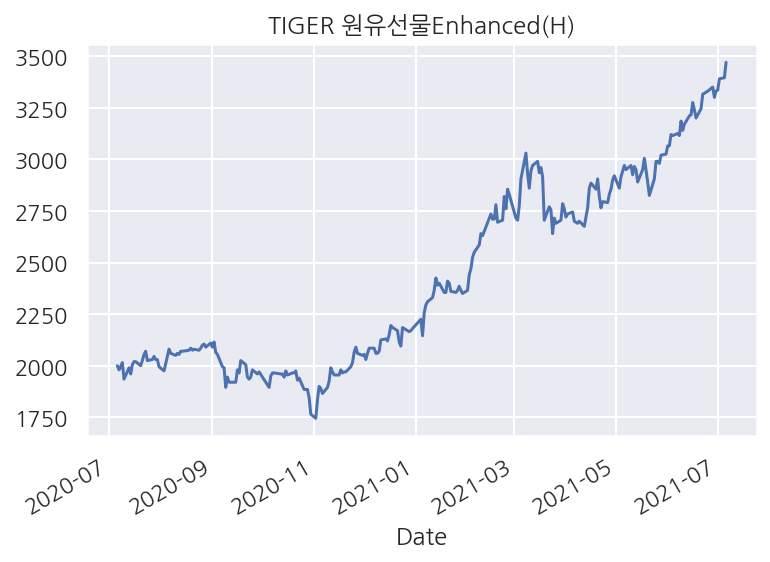

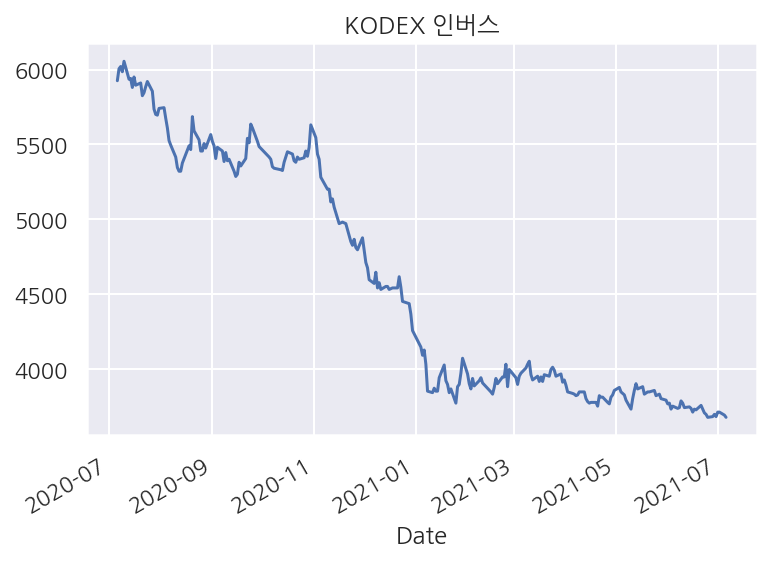

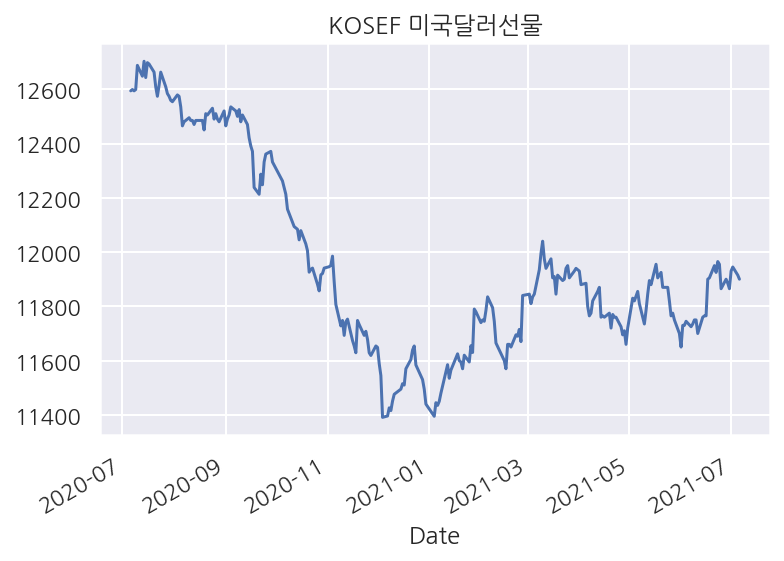

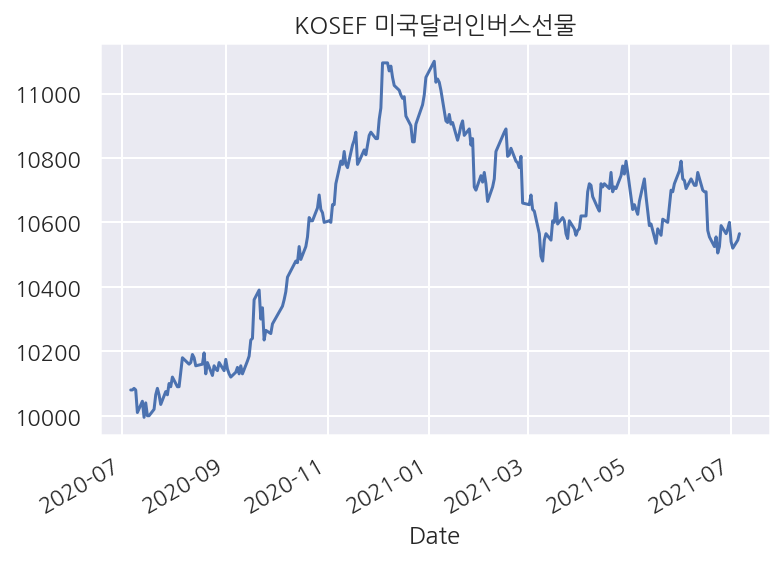

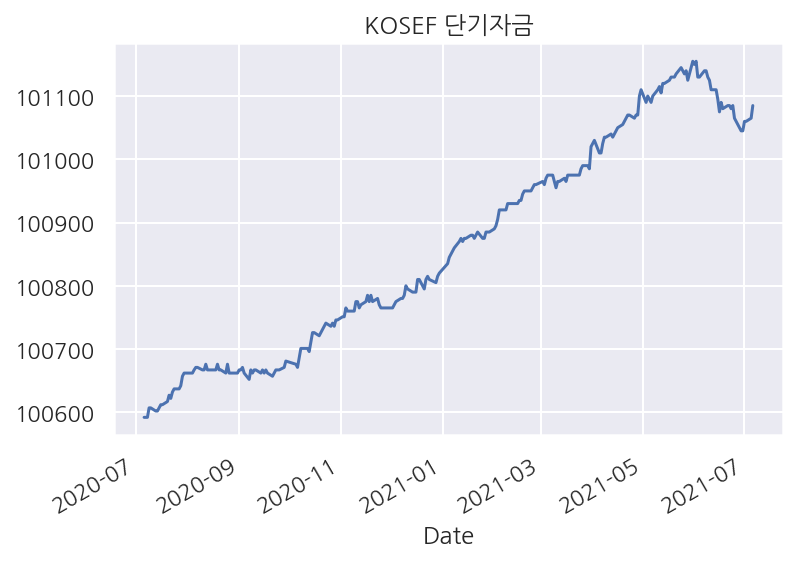

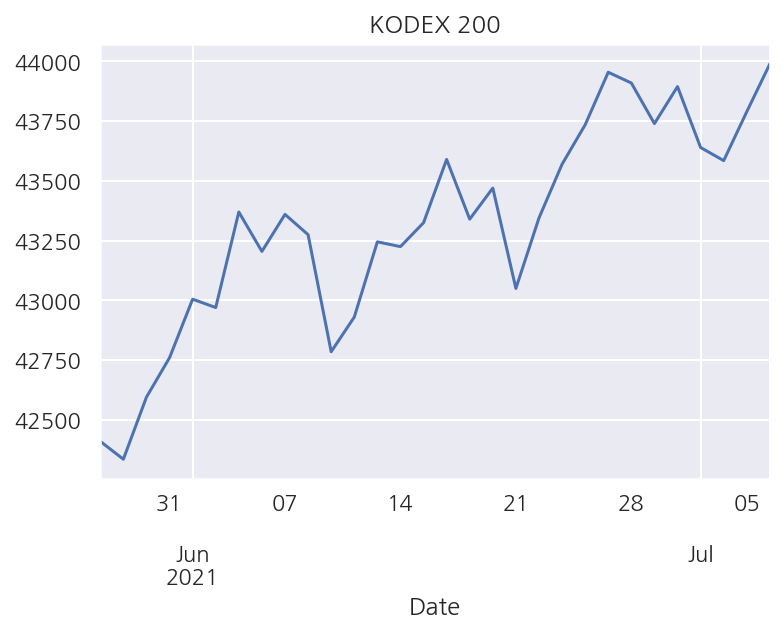

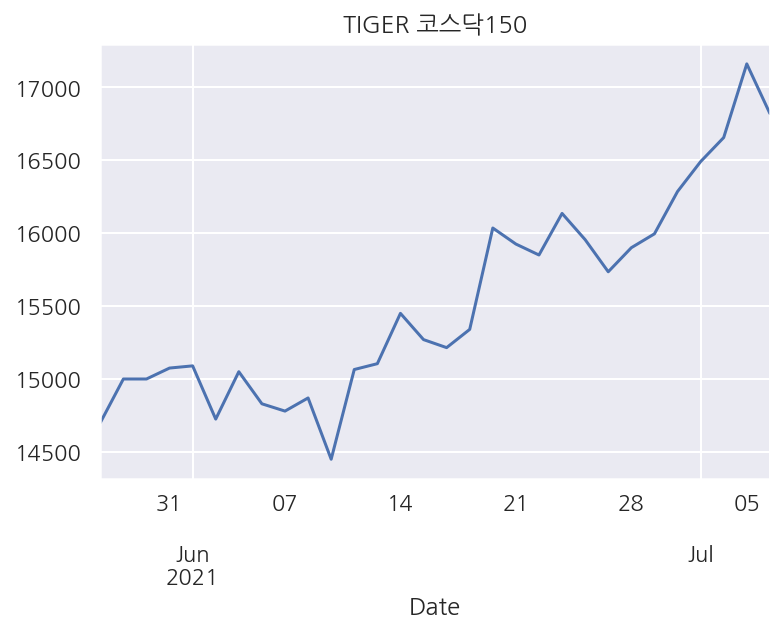

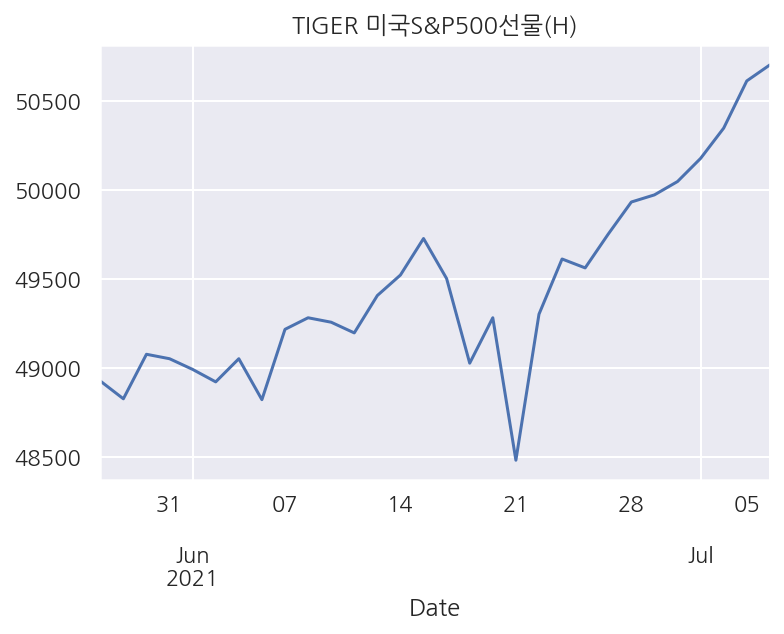

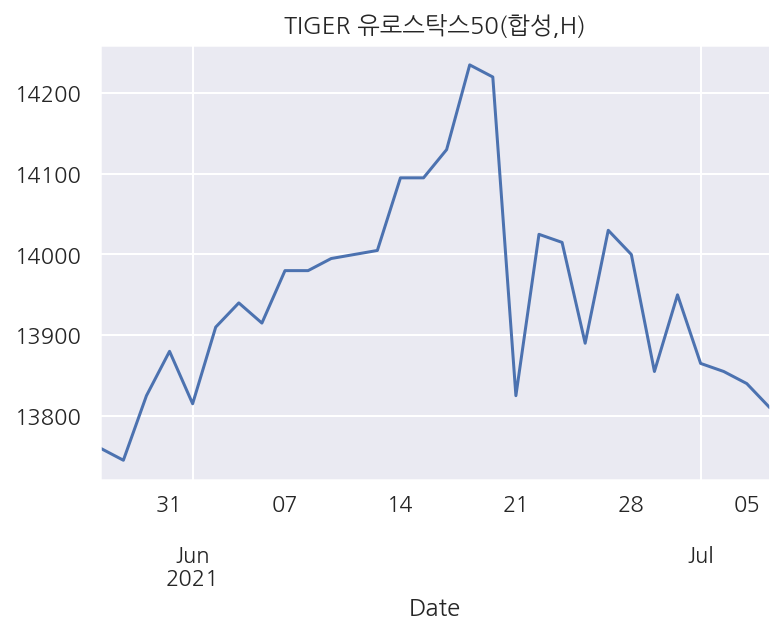

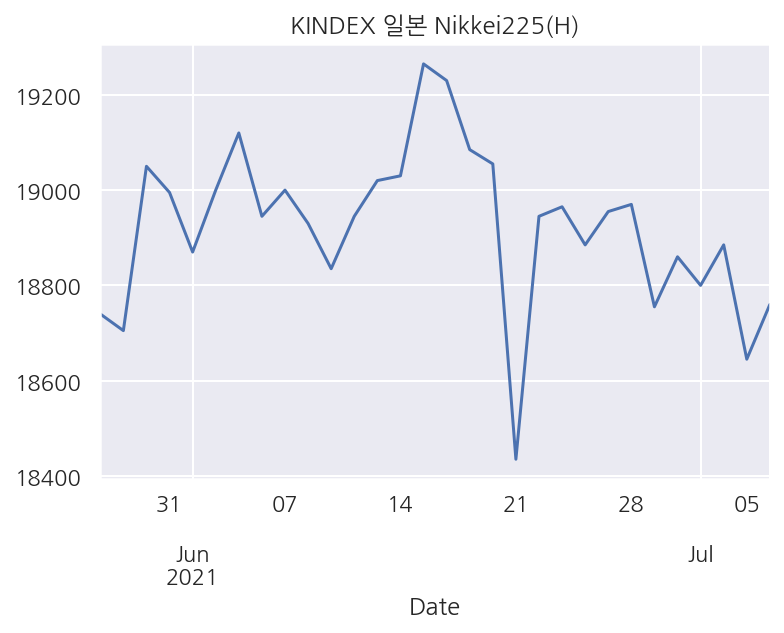

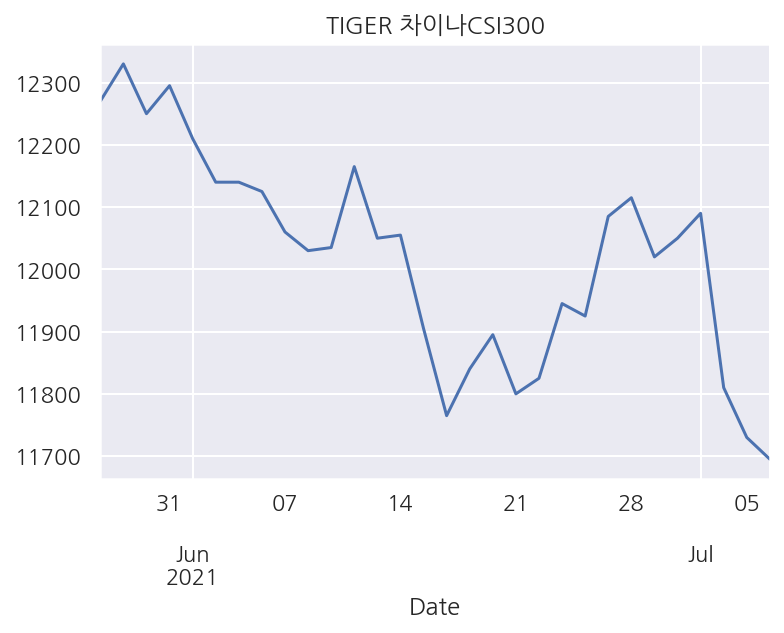

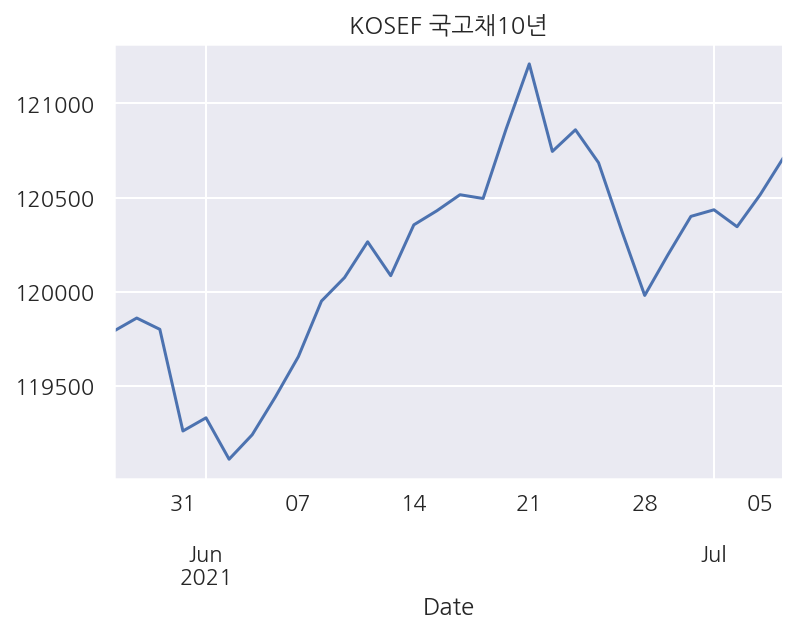

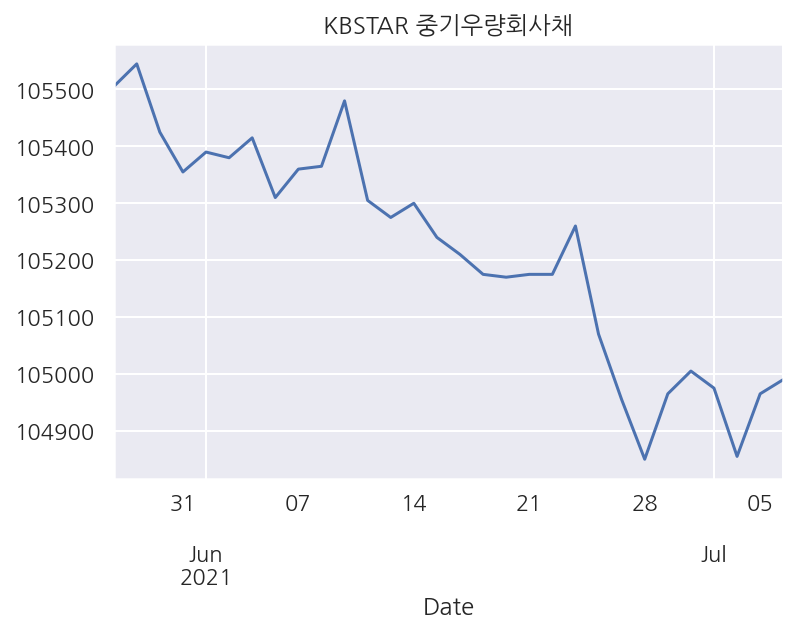

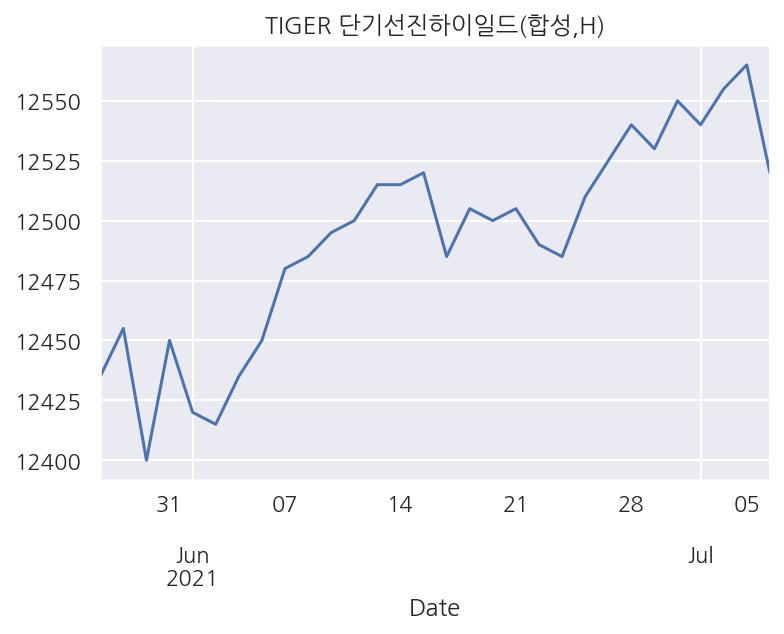

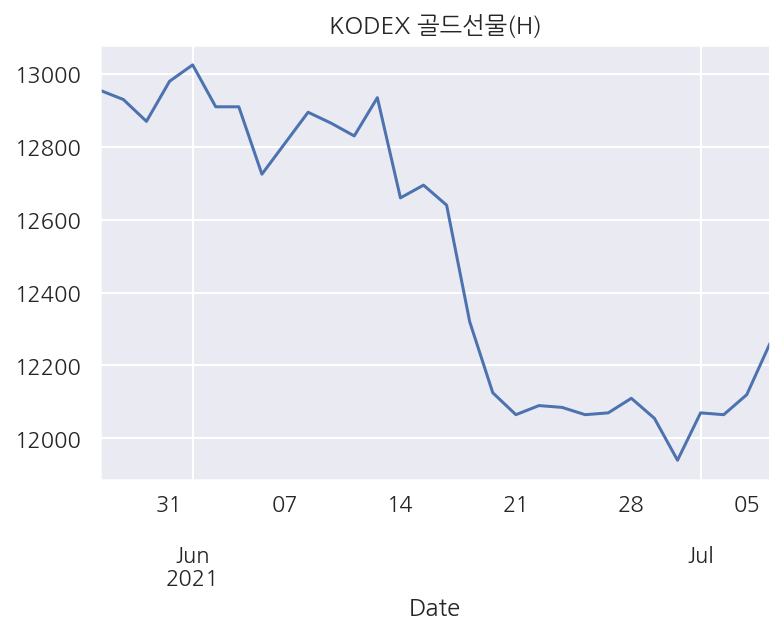

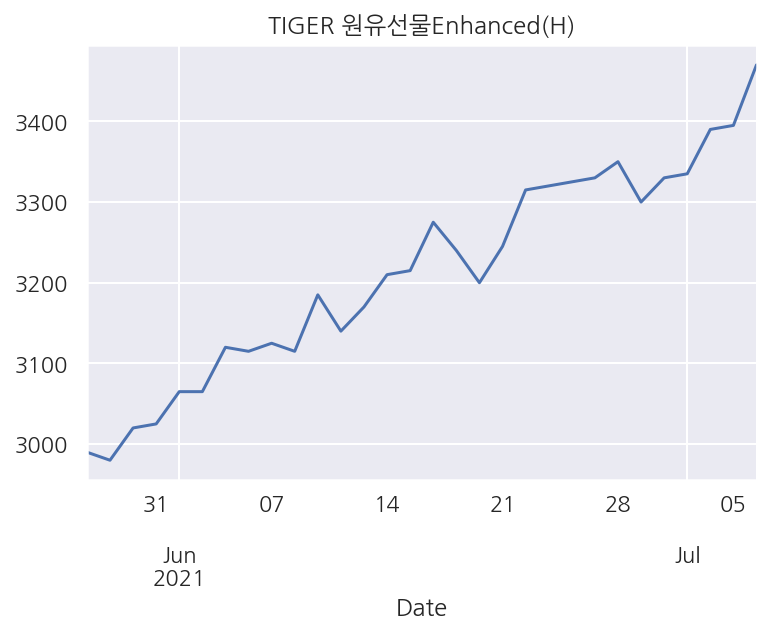

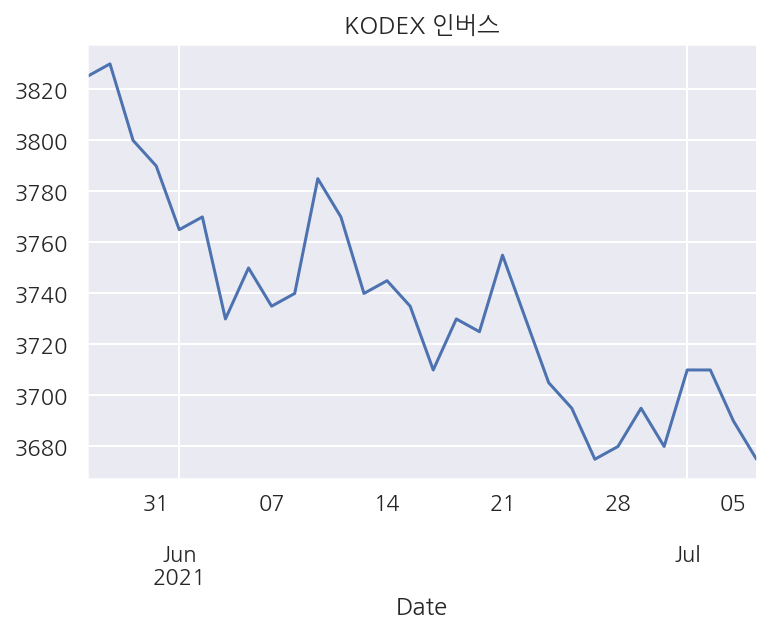

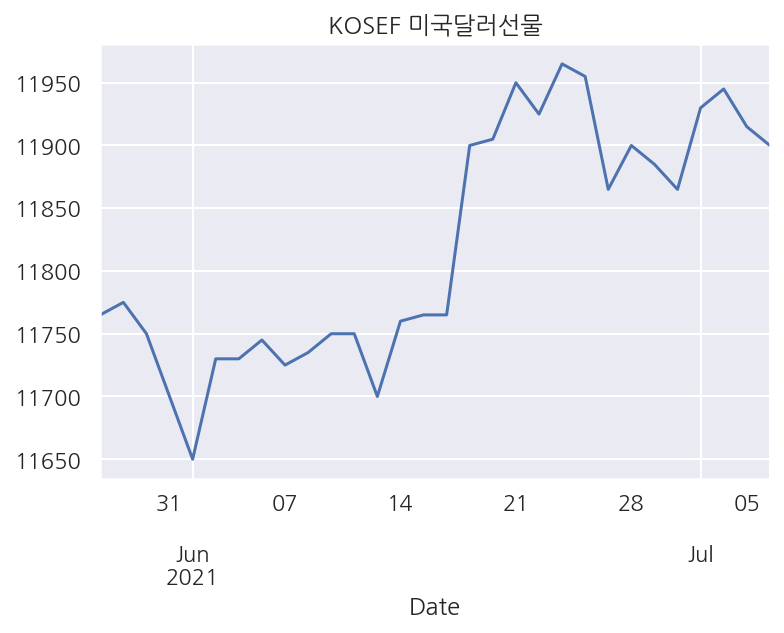

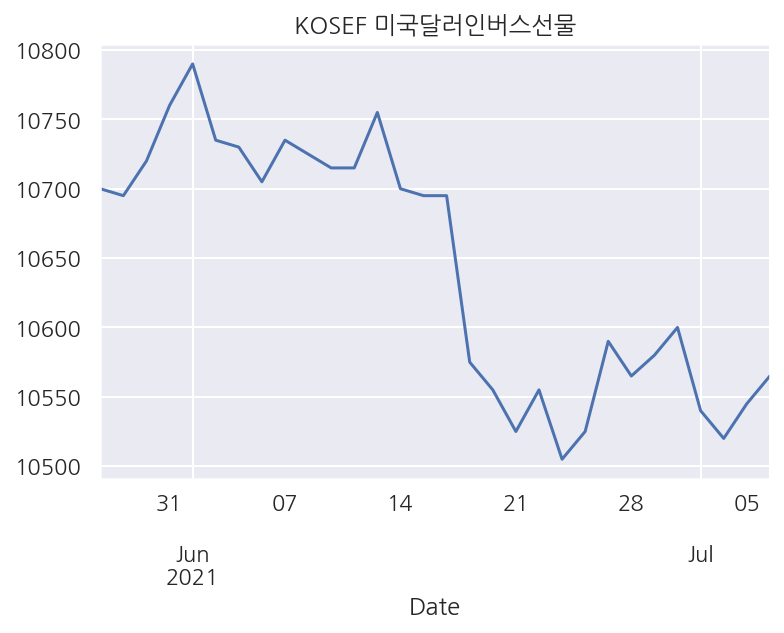

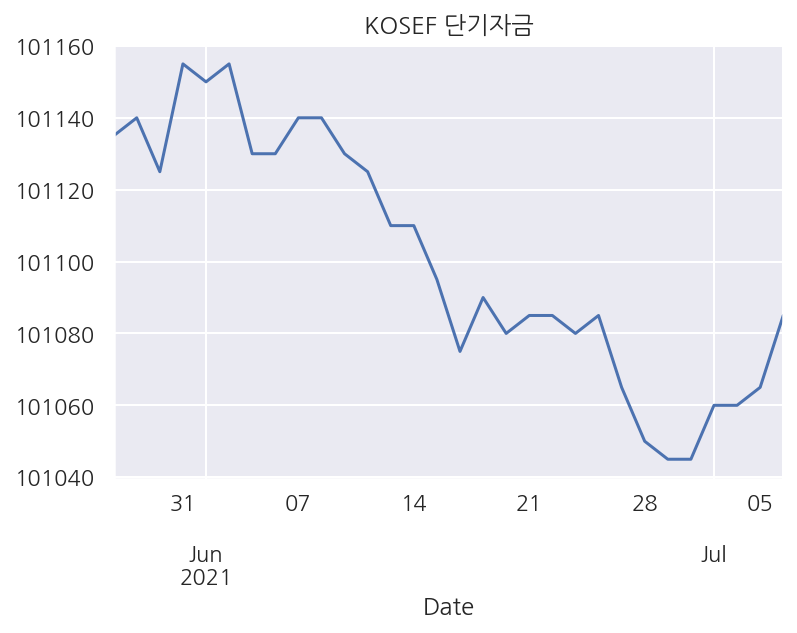

In [99]:
make_graph(df, 2021, 6, 29)

# 리밸런싱 연구

In [1]:
%load_ext autoreload
%autoreload 2
from blacklitterman import *

In [2]:
weights = np.round(np.array([6.810,10.830,6.980,4.770,13.160,12.3,10.65,0.51,8.84,11.11,0.39,0,0,11.7,1.95]) * 0.01, 4)
first_weights = list(zip(name, weights))
first_weights

[('KODEX 200', 0.0681),
 ('TIGER 코스닥150', 0.1083),
 ('TIGER 미국S&P500선물(H)', 0.0698),
 ('TIGER 유로스탁스50(합성,H)', 0.0477),
 ('KINDEX 일본 Nikkei225(H)', 0.1316),
 ('TIGER 차이나CSI300', 0.123),
 ('KOSEF 국고채10년', 0.1065),
 ('KBSTAR 중기우량회사채', 0.0051),
 ('TIGER 단기선진하이일드(합성,H)', 0.0884),
 ('KODEX 골드선물(H)', 0.1111),
 ('TIGER 원유선물Enhanced(H)', 0.0039),
 ('KODEX 인버스', 0.0),
 ('KOSEF 미국달러선물', 0.0),
 ('KOSEF 미국달러인버스선물', 0.117),
 ('KOSEF 단기자금', 0.0195)]

In [5]:
asset_allocate(10, 'momentum', 180, 2021 ,8, 2)

OrderedDict([('KODEX 200', 0.0),
             ('TIGER 코스닥150', 0.1),
             ('TIGER 미국S&P500선물(H)', 0.2),
             ('TIGER 유로스탁스50(합성,H)', 0.2),
             ('KINDEX 일본 Nikkei225(H)', 0.0),
             ('TIGER 차이나CSI300', 0.0),
             ('KOSEF 국고채10년', 0.24),
             ('KBSTAR 중기우량회사채', 0.0),
             ('TIGER 단기선진하이일드(합성,H)', 0.05),
             ('KODEX 골드선물(H)', 0.05),
             ('TIGER 원유선물Enhanced(H)', 0.15),
             ('KODEX 인버스', 0.0),
             ('KOSEF 미국달러선물', 0.0),
             ('KOSEF 미국달러인버스선물', 0.0),
             ('KOSEF 단기자금', 0.01)])

In [3]:
result = main_backtest('momentum', 'momentum', first_weights ,10, 5, 10, 2, '2021-06-01', [5],[1,1.25,1.5],[6,7,8], 2021,5,31, 2021,8,3, marcap_fix=False)
result

100%|██████████| 9/9 [04:26<00:00, 29.58s/it]

too many or little reblancing at 5-1.5-8, num:2


({'5,1,6': [9950218870.594296,
   [2021, 6, 1, 10049070942.011784],
   OrderedDict([('KODEX 200', 0.0),
                ('TIGER 코스닥150', 0.2),
                ('TIGER 미국S&P500선물(H)', 0.1901),
                ('TIGER 유로스탁스50(합성,H)', 0.0),
                ('KINDEX 일본 Nikkei225(H)', 0.2),
                ('TIGER 차이나CSI300', 0.0),
                ('KOSEF 국고채10년', 0.0),
                ('KBSTAR 중기우량회사채', 0.0),
                ('TIGER 단기선진하이일드(합성,H)', 0.2),
                ('KODEX 골드선물(H)', 0.05),
                ('TIGER 원유선물Enhanced(H)', 0.15),
                ('KODEX 인버스', 0.0),
                ('KOSEF 미국달러선물', 0.0),
                ('KOSEF 미국달러인버스선물', 0.0),
                ('KOSEF 단기자금', 0.01)]),
   [2021, 6, 9, 10164723363.456781],
   OrderedDict([('KODEX 200', 0.1),
                ('TIGER 코스닥150', 0.0),
                ('TIGER 미국S&P500선물(H)', 0.2),
                ('TIGER 유로스탁스50(합성,H)', 0.2),
                ('KINDEX 일본 Nikkei225(H)', 0.0),
                ('TIGER 차이나CSI300', 0.0),
  

<AxesSubplot:xlabel='Date'>

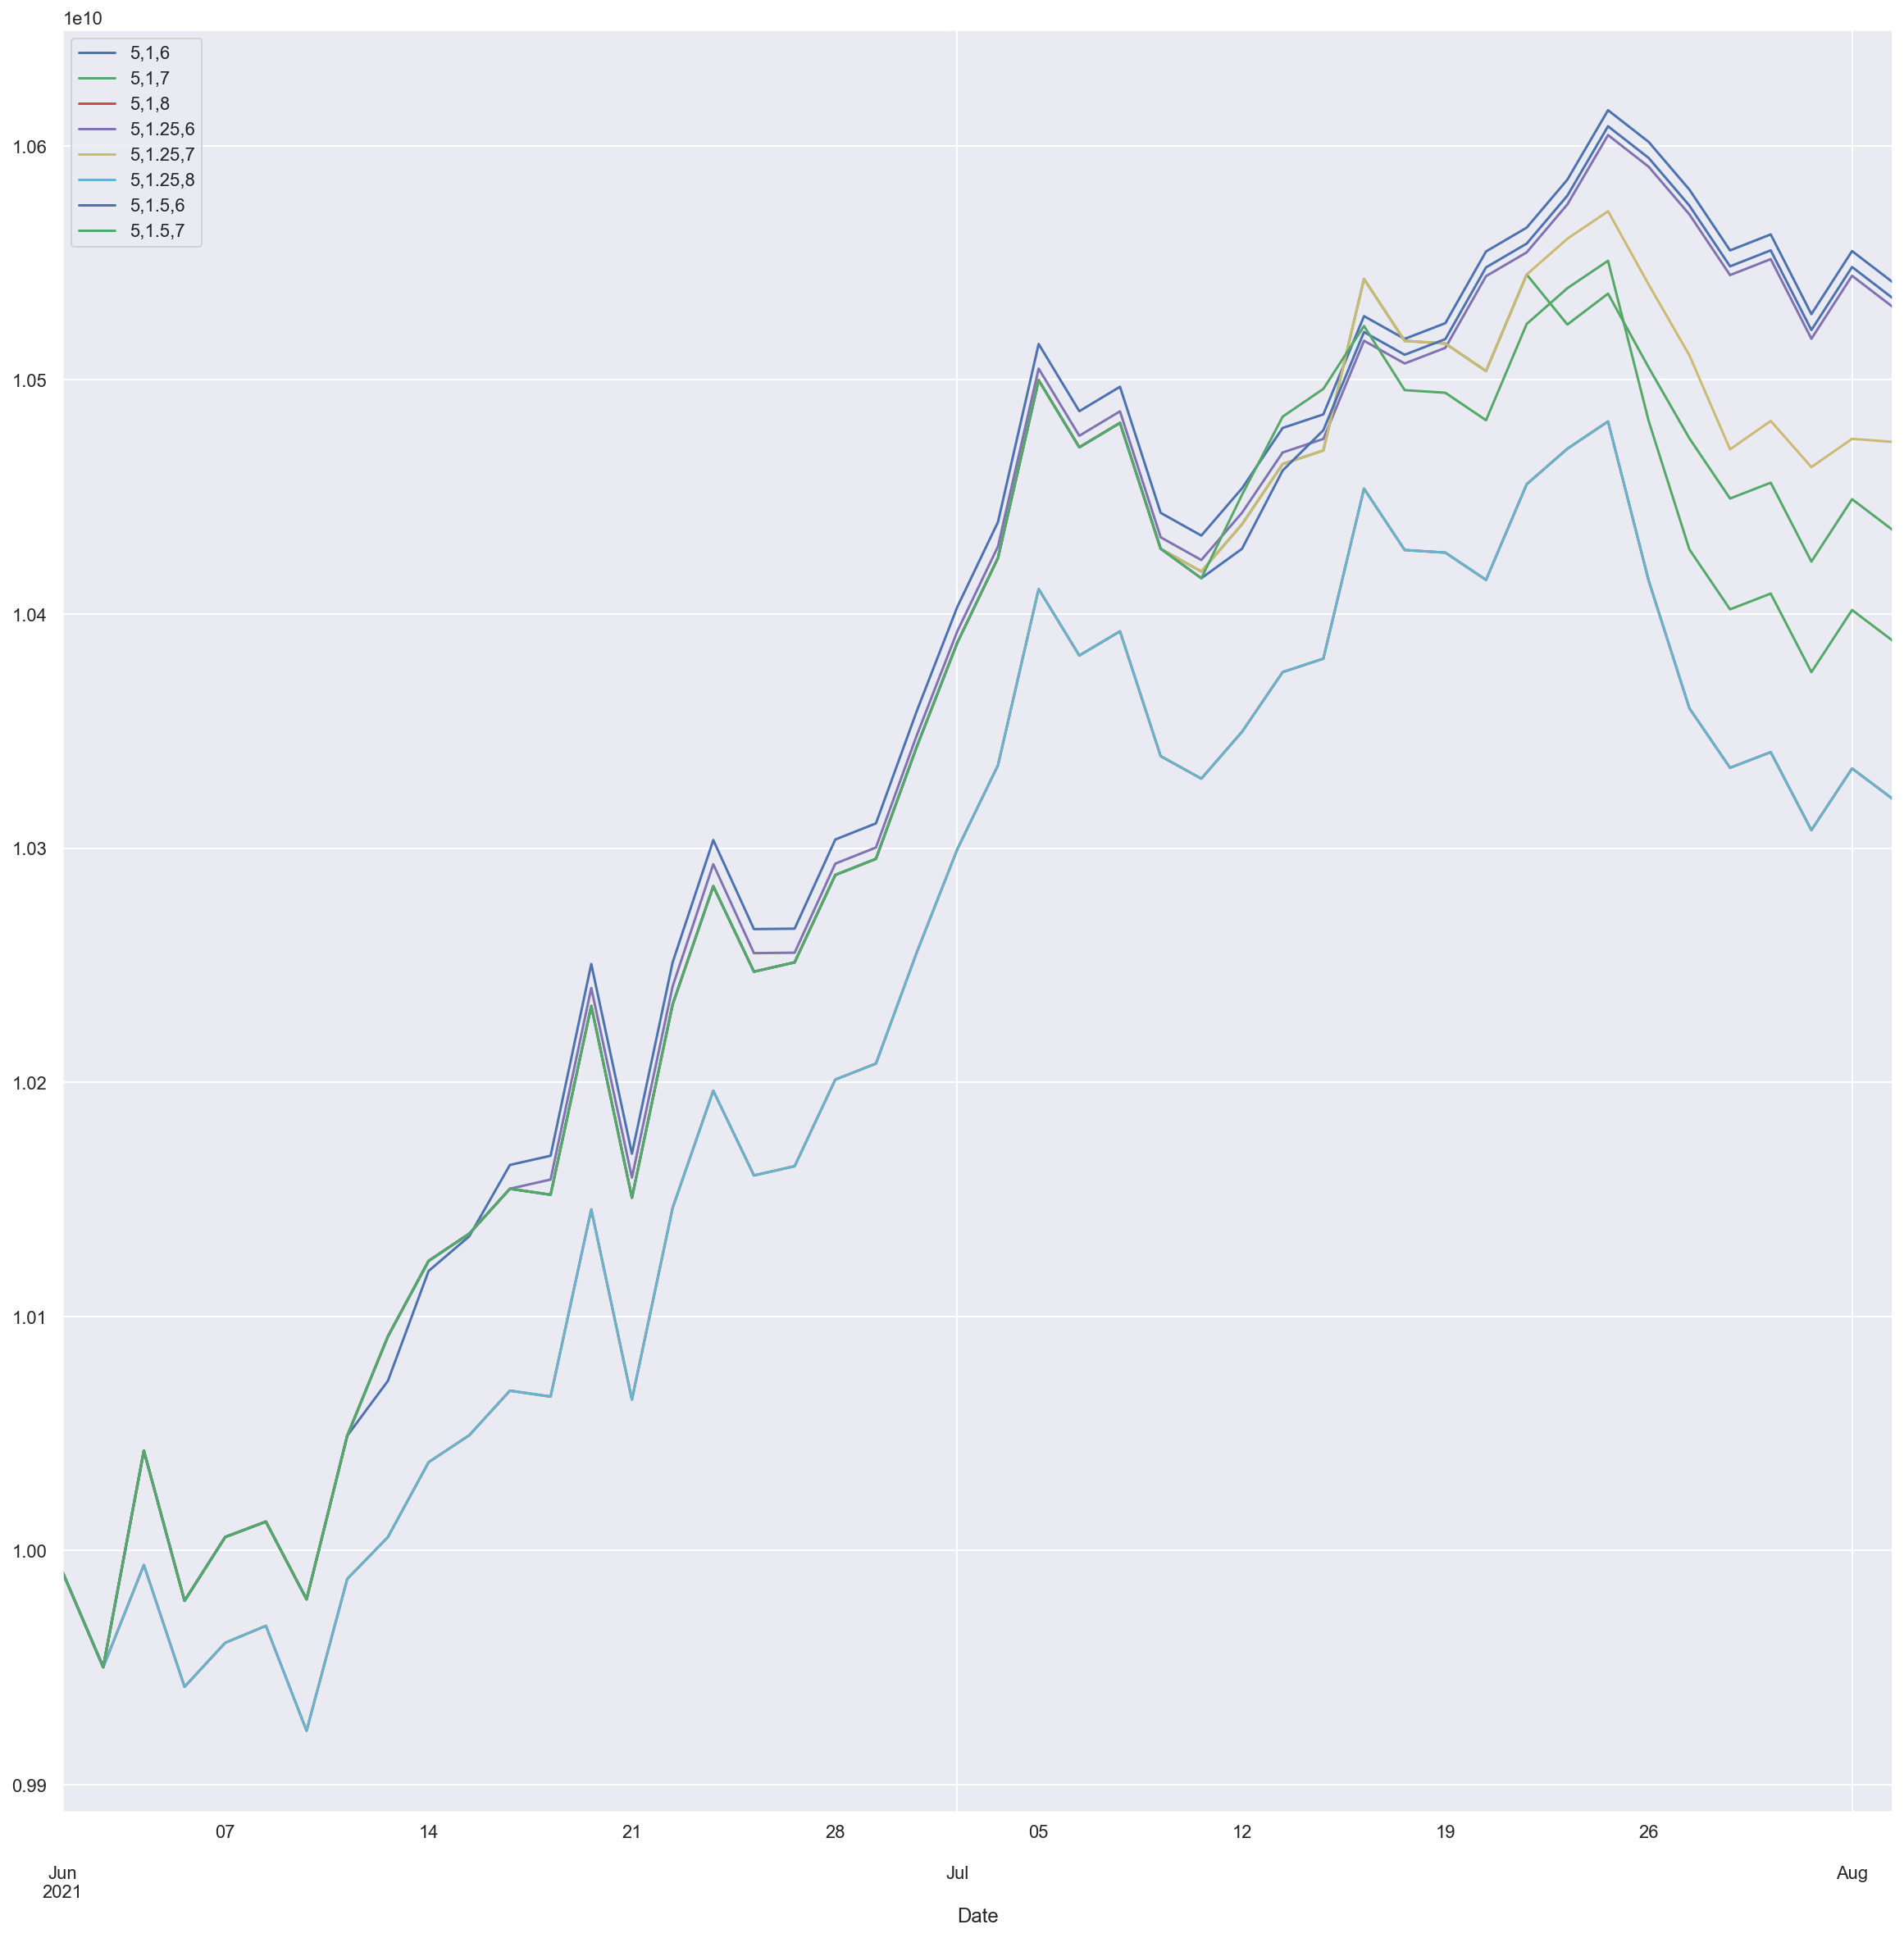

In [5]:
result[1].plot(figsize=(20,20))